In [ ]:
!pip install layoutparser # Install the base layoutparser library with  
# !pip install "layoutparser[layoutmodels]" # Install DL layout model toolkit 
!pip install "layoutparser[ocr]" # Install OCR toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.2 MB 1.2 MB/s 
     |████████████████████████████████| 596 kB 69.9 MB/s 
     |████████████████████████████████| 40 kB 4.8 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 3.1 MB 52.0 MB/s 
     |████████████████████████████████| 5.6 MB 27.2 MB/s 
     |████████████████████████████████| 142 kB 63.2 MB/s 
     |████████████████████████████████| 4.1 MB 56.4 MB/s 
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=71493467a64aec51c5735ff5ddccb4c6851cd681989259486957d6f798be3840
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
Successfully built iopath
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Att

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 435 kB 37.9 MB/s 


In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-l8s7dr8s/detectron2_bfd6f964f5ba411590a8a4f53f224e1d
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-l8s7dr8s/detectron2_bfd6f964f5ba411590a8a4f53f224e1d
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
     |████████████████████████████████| 47 kB 5.2 MB/s 
     |████████████████████████████████| 79 kB 8.5 MB/s 
     |████████████████████████████████| 117 kB 76.2 MB/s 
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=5117598 sha256=397f2a62a1029479a4d4d226e24d867e5c15717cc62b5e8565cd98ed5400f946
  Stored in directory: /tmp/pip-ephem-wheel-cache-cpzaozdd/wheels/87/3f/26/dc45098d34763c9dc05ea3ab35c6dec6e9e8c16ac741efb741
  Created wheel for fvcore: filename=fvcore-0.1.3.post20

In [ ]:
!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1340, done.
remote: Counting objects: 100% (365/365), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 1340 (delta 319), reused 254 (delta 254), pack-reused 975
Receiving objects: 100% (1340/1340), 62.85 MiB | 15.34 MiB/s, done.
Resolving deltas: 100% (732/732), done.


In [ ]:
%cd layout-parser/

/content/layout-parser


In [ ]:
import cv2
image = cv2.imread("/content/coco cola 10-k.png")#reading the image
image = image[..., ::-1]

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:101: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


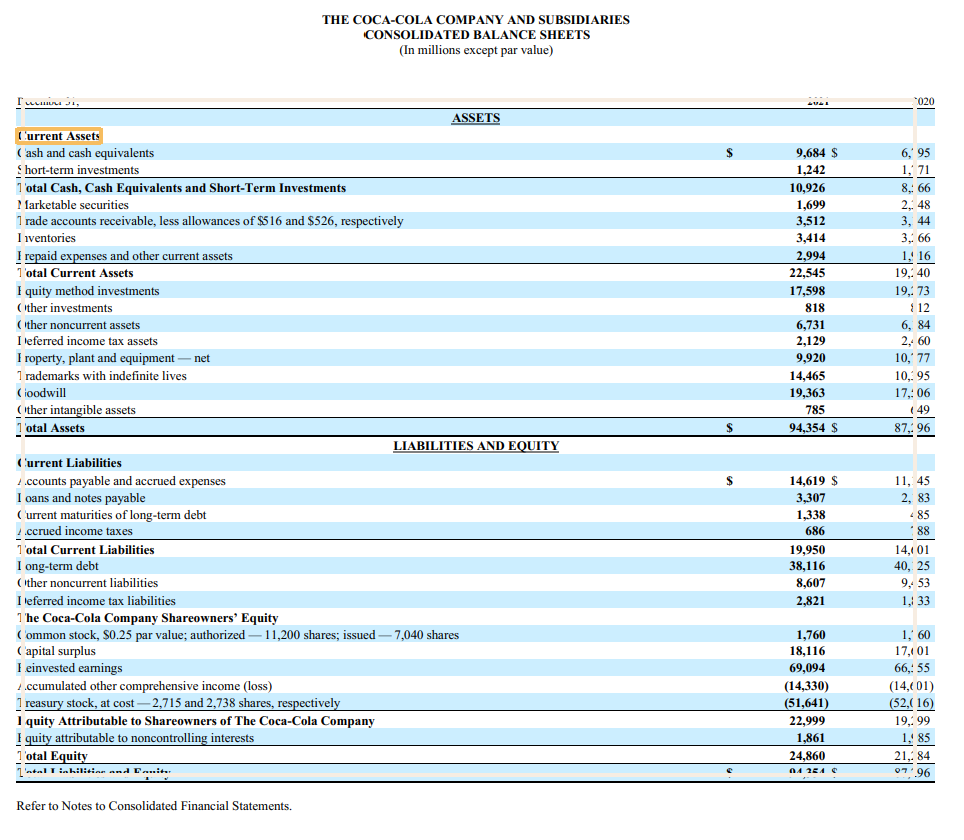

In [ ]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

In [ ]:
layout #checking the layout , title and table has been identified in the picture

Layout(_blocks=[TextBlock(block=Rectangle(x_1=23.729583740234375, y_1=99.23088836669922, x_2=914.1573486328125, y_2=775.9755859375), text=None, id=None, type=Table, parent=None, next=None, score=0.9906851649284363), TextBlock(block=Rectangle(x_1=17.901247024536133, y_1=128.91867065429688, x_2=100.6133041381836, y_2=143.90350341796875), text=None, id=None, type=Title, parent=None, next=None, score=0.7574394941329956)], page_data={})

In [ ]:
text_blocks = lp.Layout([block for block in layout if block.type=="Table"]) #checking the type as Table
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=23.729583740234375, y_1=99.23088836669922, x_2=914.1573486328125, y_2=775.9755859375), text=None, id=None, type=Table, parent=None, next=None, score=0.9906851649284363)], page_data={})

In [ ]:
figure_blocks = lp.Layout([block for block in layout if block.type=='Figure'])#checking the type as Figure
figure_blocks

Layout(_blocks=[], page_data={})

In [ ]:
text_blocks = lp.Layout([block for block in text_blocks if not any(block.is_in(block_fig) for block_fig in figure_blocks)])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=23.729583740234375, y_1=99.23088836669922, x_2=914.1573486328125, y_2=775.9755859375), text=None, id=None, type=Table, parent=None, next=None, score=0.9906851649284363)], page_data={})

In [ ]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

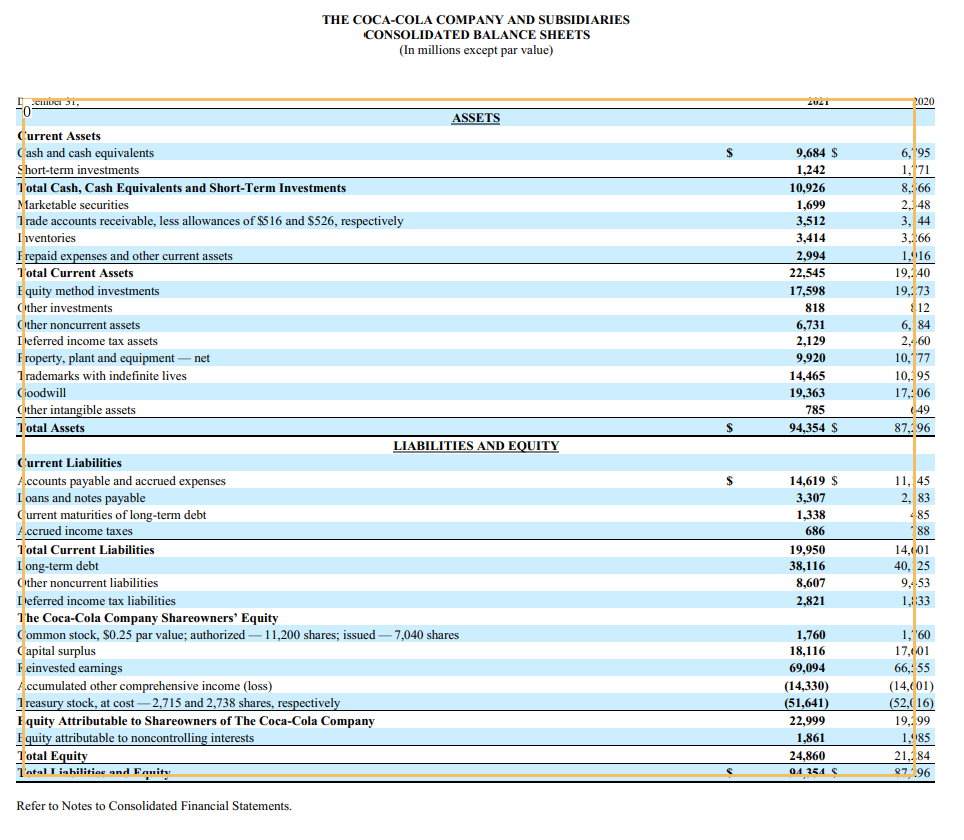

In [ ]:
lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)

In [ ]:
!pip install tabula-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 19.0 MB/s 


In [ ]:
cordinates=[text_blocks[0].block.x_1,text_blocks[0].block.x_2,text_blocks[0].block.y_1,text_blocks[0].block.y_2]
cordinates

[23.729583740234375, 914.1573486328125, 99.23088836669922, 775.9755859375]

In [ ]:
cordinates_new=[i+10 for i in cordinates]#increasing the cordinates by 10 for managing error 

In [ ]:
final_cordinates=str(cordinates_new).replace('[','').replace(']','')

In [ ]:
#table post the cordinate
import tabula
tables=tabula.read_pdf('/content/0000021344-22-000009.pdf',pages='64',area=final_cordinates,guess=True,stream=True)
tables[0]

,Unnamed: 0,THE COCA-COLA COMPANY AND SUBSIDIARIES,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,CONSOLIDATED BALANCE SHEETS,NaN,NaN,NaN
1,NaN,(In millions except par value),NaN,NaN,NaN
2,"December 31,",NaN,NaN,2021,2020
3,NaN,ASSETS,NaN,NaN,NaN
4,Current Assets,NaN,NaN,NaN,NaN
5,Cash and cash equivalents,NaN,$,"9,684 $","6,795"
6,Short-term investments,NaN,NaN,"1,242","1,771"
7,"Total Cash, Cash Equivalents and Short-Term In...",NaN,NaN,"10,926","8,566"
8,Marketable securities,NaN,NaN,"1,699","2,348"
9,"Trade accounts receivable, less allowances of ...",NaN,NaN,"3,512","3,144"


In [ ]:
#table before cordinate with pdf plumber
import pdfplumber
pdf=pdfplumber.open('/content/0000021344-22-000009.pdf') 
pages=pdf.pages

In [ ]:
#table before cordinate
import tabula
tables_wo_dl=tabula.read_pdf('/content/0000021344-22-000009.pdf',pages='64')
tables_wo_dl[0]

,ASSETS,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Current Assets,NaN,NaN,NaN,NaN
1,Cash and cash equivalents,$,"9,684",$,"6,795"
2,Short-term investments,"1,242","1,771",NaN,NaN
3,"Total Cash, Cash Equivalents and Short-Term In...","10,926","8,566",NaN,NaN
4,Marketable securities,"1,699","2,348",NaN,NaN
5,"Trade accounts receivable, less allowances of ...","3,512","3,144",NaN,NaN
6,Inventories,"3,414","3,266",NaN,NaN
7,Prepaid expenses and other current assets,"2,994","1,916",NaN,NaN
8,Total Current Assets,"22,545","19,240",NaN,NaN
9,Equity method investments,"17,598","19,273",NaN,NaN
